<a href="https://colab.research.google.com/github/karolinakuligowska/Projektowanie_systemow_informatycznych/blob/main/5_Zajecia_Analiza_sentymentu_w_czasie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("SentimentAnalysis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘NLP’, ‘slam’, ‘BH’, ‘tau’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘lars’, ‘randomForest’, ‘tm’, ‘qdapDictionaries’, ‘ngramrr’, ‘moments’, ‘stringdist’, ‘glmnet’, ‘spikeslab’




In [11]:
install.packages(c("ggplot2", "ggthemes", "tidyverse", "SnowballC"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
# Analiza sentymentu w czasie ----

library(SentimentAnalysis)
library(ggplot2)
library(ggthemes)
library(tidyverse)
library(SnowballC)

In [13]:
# Jeden cały plik ----

# Wczytanie danych tekstowych
# Odczytanie lokalnego pliku .txt
text <- readLines("Trump2025.txt", encoding="UTF-8")

         Length Class  Mode     
negative 2005   -none- character
positive 1637   -none- character

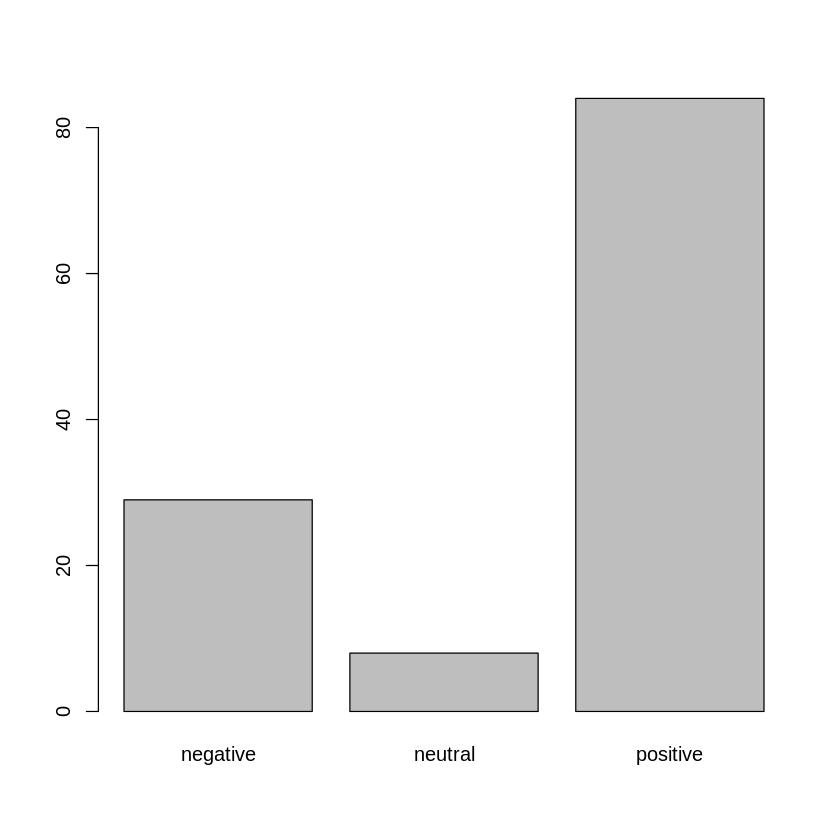

         Length Class  Mode     
negative  85    -none- character
positive 105    -none- character

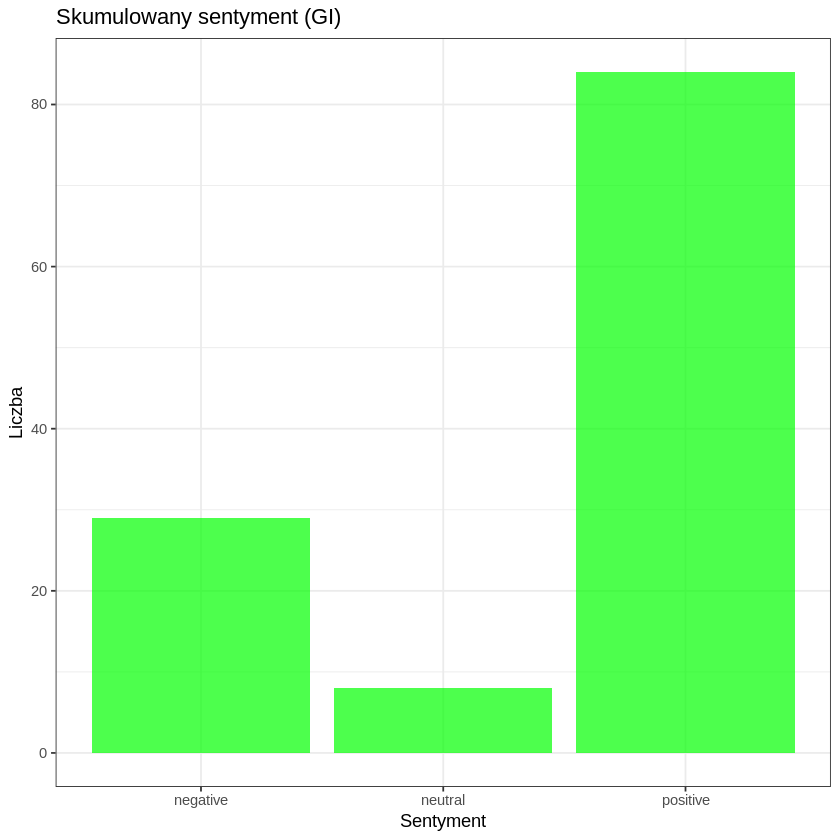

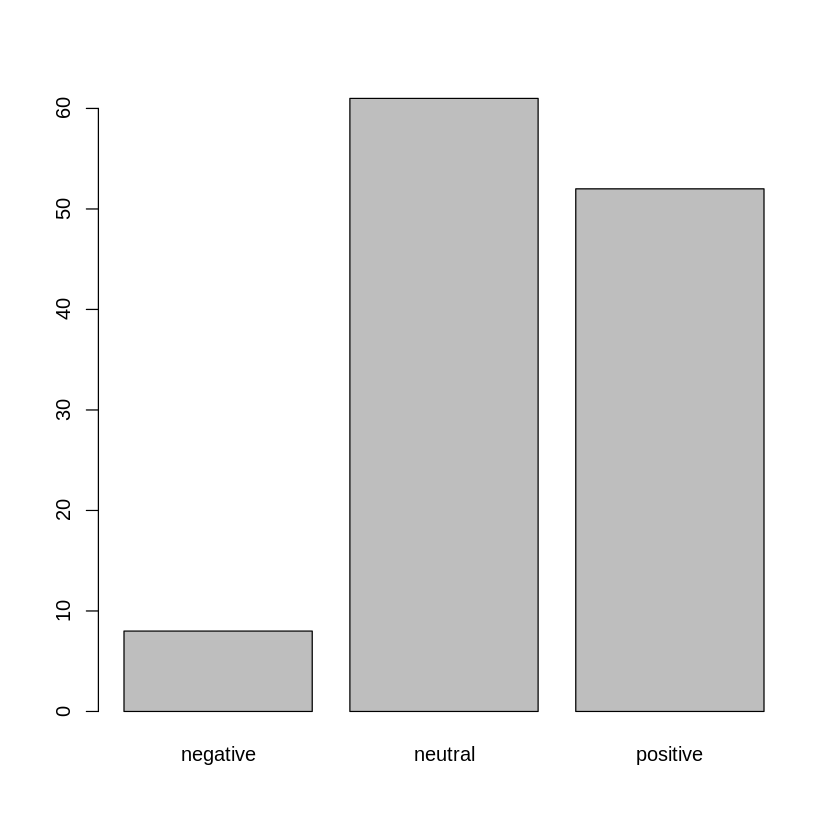

            Length Class  Mode     
negative    2355   -none- character
positive     354   -none- character
uncertainty  297   -none- character

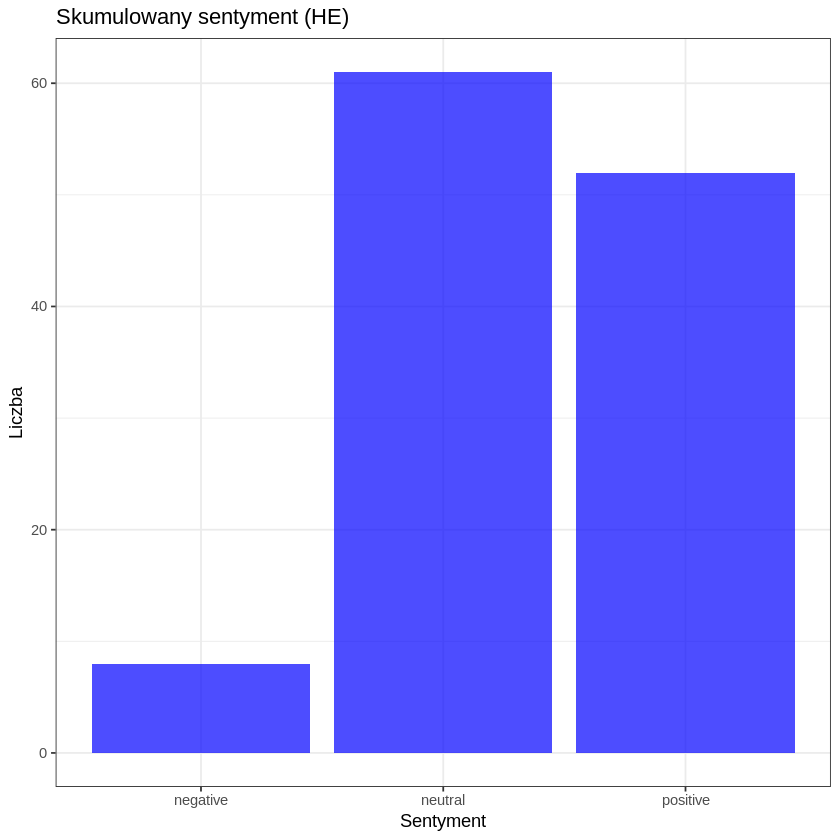

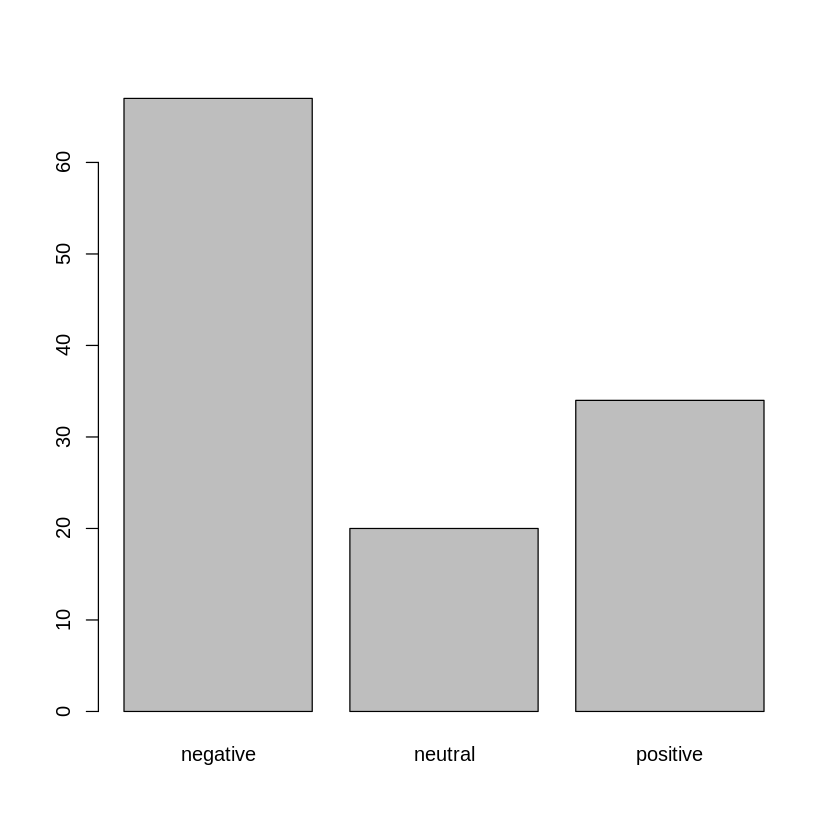

Dictionary type:  binary (positive / negative)
Total entries:    4232
Positive entries: 1280 (30.25%)
Negative entries: 2952 (69.75%)


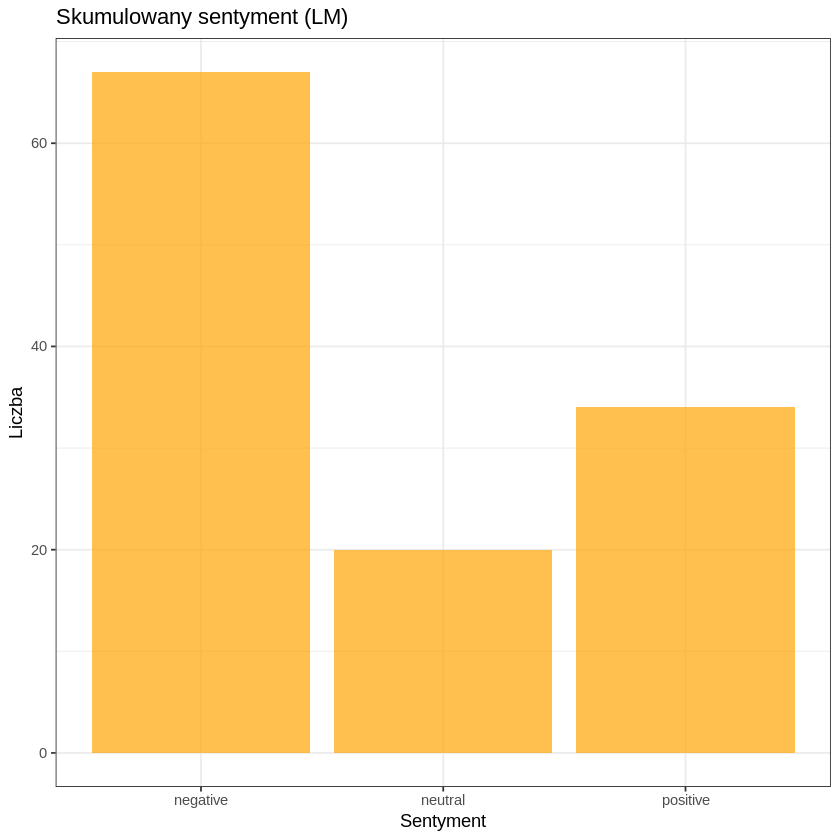

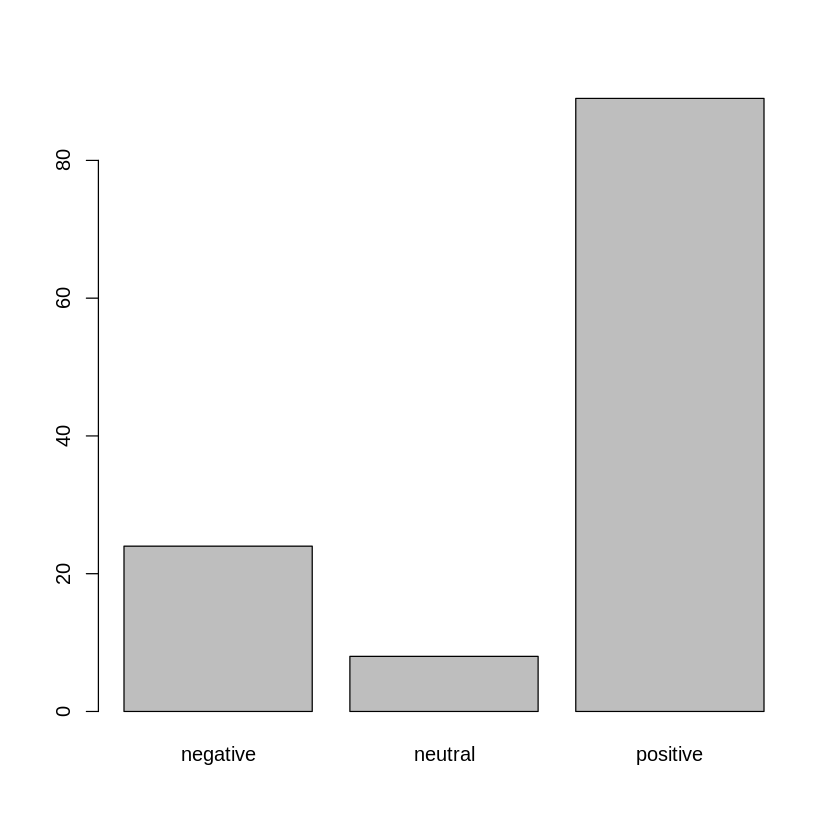

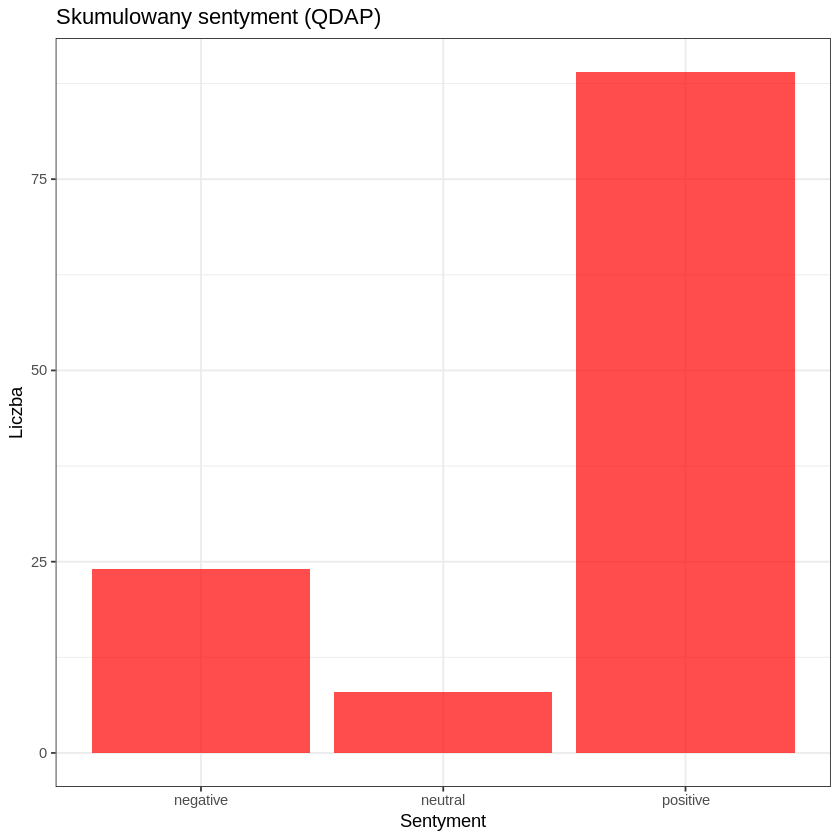

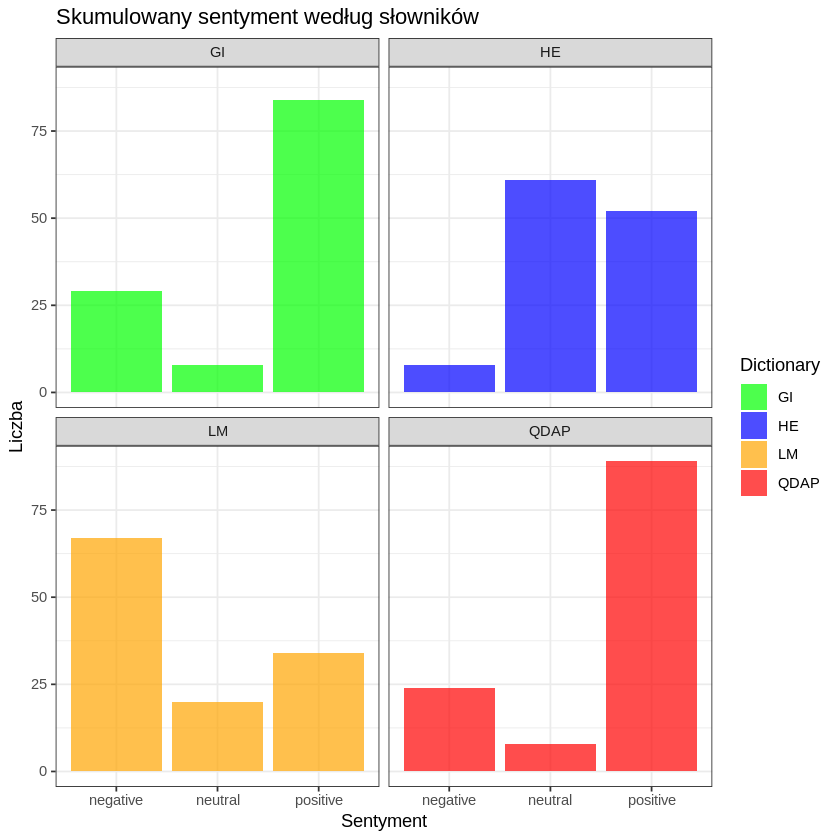

In [14]:
# Analiza sentymentu przy użyciu pakietu SentimentAnalysis ----
sentiment <- analyzeSentiment(text)


# odkomentuj i zobacz parametry funkcji:
# ?analyzeSentiment




### Słownik GI (General Inquirer) ----
#
# Słownik ogólnego zastosowania
# zawiera listę słów pozytywnych i negatywnych
# zgodnych z psychologicznym słownikiem harwardzkim Harvard IV-4
# DictionaryGI


# Wczytaj słownik GI
data(DictionaryGI)
summary(DictionaryGI)


# Konwersja ciągłych wartości sentymentu
# na odpowiadające im wartości kierunkowe
# zgodnie ze słownikiem GI
sentimentGI <- convertToDirection(sentiment$SentimentGI)


# Wykres skumulowanego sentymentu kierunkowego
plot(sentimentGI)


# Ten sam wykres w ggplot2:
# Konwersja do ramki danych (ggplot wizualizuje ramki danych)
df_GI <- data.frame(index = seq_along(sentimentGI), value = sentimentGI, Dictionary = "GI")

# Usunięcie wierszy, które zawierają NA
df_GI <- na.omit(df_GI)

ggplot(df_GI, aes(x = value)) +
  geom_bar(fill = "green", alpha = 0.7) +
  labs(title = "Skumulowany sentyment (GI)",
       x = "Sentyment",
       y = "Liczba") +
  theme_bw()




### Słownik HE (Henry’s Financial dictionary) ----
#
# zawiera listę słów pozytywnych i negatywnych
# zgodnych z finansowym słownikiem "Henry 2008"
# pierwszy, jaki powstał w wyniku analizy komunikatów prasowych
# dotyczących zysków w branży telekomunikacyjnej i usług IT
# DictionaryHE


# Wczytaj słownik HE
data(DictionaryHE)
summary(DictionaryHE)


# Konwersja ciągłych wartości sentymentu
# na odpowiadające im wartości kierunkowe
# zgodnie ze słownikiem HE
sentimentHE <- convertToDirection(sentiment$SentimentHE)


# Wykres skumulowanego sentymentu kierunkowego
plot(sentimentHE)


# Ten sam wykres w ggplot2:
# Konwersja do ramki danych (ggplot wizualizuje ramki danych)
df_HE <- data.frame(index = seq_along(sentimentHE), value = sentimentHE, Dictionary = "HE")

# Usunięcie wierszy, które zawierają NA
df_HE <- na.omit(df_HE)

ggplot(df_HE, aes(x = value)) +
  geom_bar(fill = "blue", alpha = 0.7) +
  labs(title = "Skumulowany sentyment (HE)",
       x = "Sentyment",
       y = "Liczba") +
  theme_bw()




### Słownik LM (Loughran-McDonald Financial dictionary) ----
#
# zawiera listę słów pozytywnych i negatywnych oraz związanych z niepewnością
# zgodnych z finansowym słownikiem Loughran-McDonald
# DictionaryLM


# Wczytaj słownik LM
data(DictionaryLM)
summary(DictionaryLM)


# Konwersja ciągłych wartości sentymentu
# na odpowiadające im wartości kierunkowe
# zgodnie ze słownikiem LM
sentimentLM <- convertToDirection(sentiment$SentimentLM)


# Wykres skumulowanego sentymentu kierunkowego
plot(sentimentLM)


# Ten sam wykres w ggplot2:
# Konwersja do ramki danych (ggplot wizualizuje ramki danych)
df_LM <- data.frame(index = seq_along(sentimentLM), value = sentimentLM, Dictionary = "LM")

# Usunięcie wierszy, które zawierają NA
df_LM <- na.omit(df_LM)

ggplot(df_LM, aes(x = value)) +
  geom_bar(fill = "orange", alpha = 0.7) +
  labs(title = "Skumulowany sentyment (LM)",
       x = "Sentyment",
       y = "Liczba") +
  theme_bw()




### Słownik QDAP (Quantitative Discourse Analysis Package) ----
#
# zawiera listę słów pozytywnych i negatywnych
# do analizy dyskursu


# Wczytaj słownik QDAP
qdap <- loadDictionaryQDAP()
summary(qdap)


# Konwersja ciągłych wartości sentymentu
# na odpowiadające im wartości kierunkowe
# zgodnie ze słownikiem QDAP
sentimentQDAP <- convertToDirection(sentiment$SentimentQDAP)


# Wykres skumulowanego sentymentu kierunkowego
plot(sentimentQDAP)


# Ten sam wykres w ggplot2:
# Konwersja do ramki danych (ggplot wizualizuje ramki danych)
df_QDAP <- data.frame(index = seq_along(sentimentQDAP), value = sentimentQDAP, Dictionary = "QDAP")

# Usunięcie wierszy, które zawierają NA
df_QDAP <- na.omit(df_QDAP)

ggplot(df_QDAP, aes(x = value)) +
  geom_bar(fill = "red", alpha = 0.7) +
  labs(title = "Skumulowany sentyment (QDAP)",
       x = "Sentyment",
       y = "Liczba") +
  theme_bw()



# Porównanie sentymentu na podstawie różnych słowników ----

# Minimalistycznie
# plot(convertToDirection(sentiment$SentimentGI))
# plot(convertToDirection(sentiment$SentimentHE))
# plot(convertToDirection(sentiment$SentimentLM))
# plot(convertToDirection(sentiment$SentimentQDAP))


# Wizualnie lepsze w ggplot2
# Połączenie poszczególnych ramek w jedną ramkę
df_all <- bind_rows(df_GI, df_HE, df_LM, df_QDAP)

# Tworzenie wykresu z podziałem na słowniki
ggplot(df_all, aes(x = value, fill = Dictionary)) +
  geom_bar(alpha = 0.7) +
  labs(title = "Skumulowany sentyment według słowników",
       x = "Sentyment",
       y = "Liczba") +
  theme_bw() +
  facet_wrap(~Dictionary) +  # Podział na cztery osobne wykresy
  scale_fill_manual(values = c("GI" = "green",
                               "HE" = "blue",
                               "LM" = "orange",
                               "QDAP" = "red" ))



[1] 241

sentence,GI,HE,LM,QDAP
<int>,<dbl>,<dbl>,<dbl>,<dbl>


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


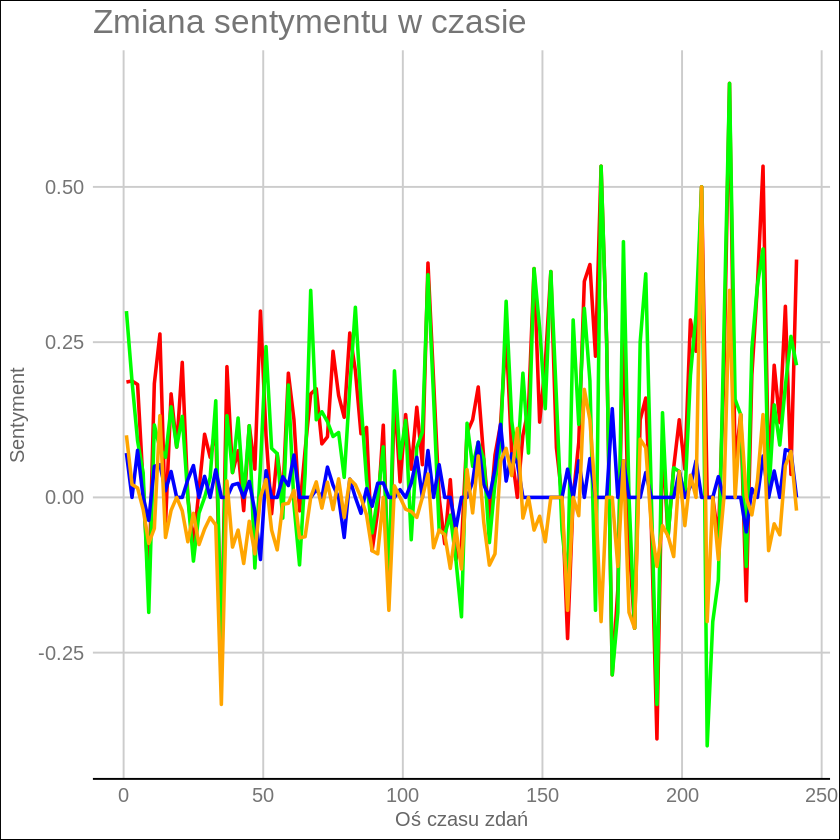

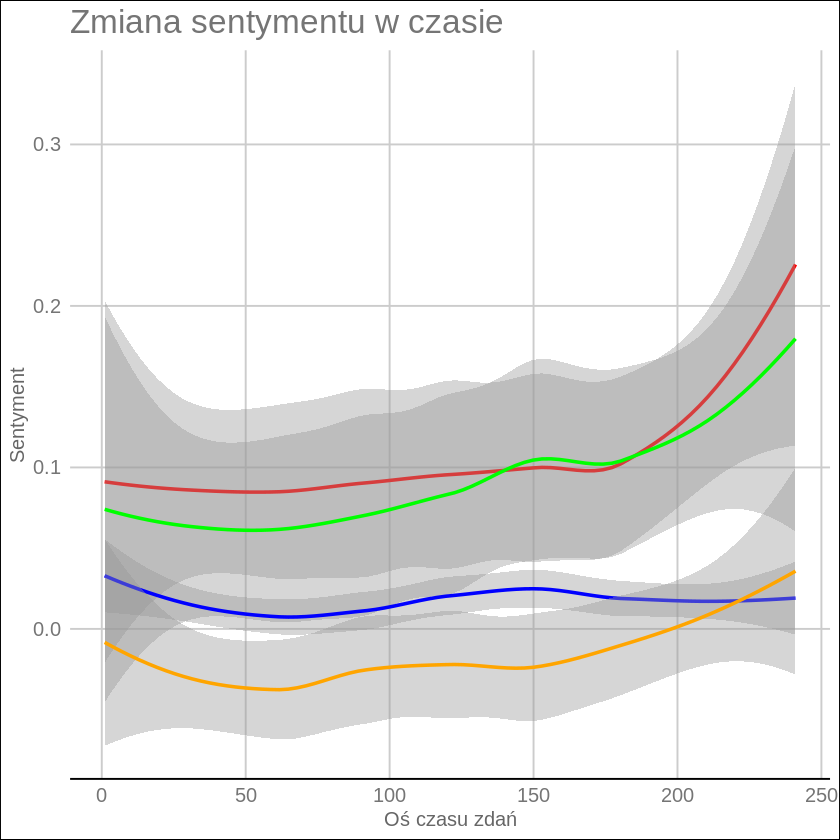

In [16]:
# Agregowanie sentymentu z różnych słowników w czasie ----


# Sprawdzenie ilości obserwacji
length(sentiment[,1])


# Utworzenie ramki danych
df_all <- data.frame(sentence=1:length(sentiment[,1]),
                     GI=sentiment$SentimentGI,
                     HE=sentiment$SentimentHE,
                     LM=sentiment$SentimentLM,
                     QDAP=sentiment$SentimentQDAP)



# USUNIĘCIE BRAKUJĄCYCH WARTOŚCI
# gdyż wartości NA (puste) uniemożliwiają generowanie wykresu w ggplot
#

# Usunięcie wartości NA
# Wybranie tylko niekompletnych przypadków:
puste <- df_all[!complete.cases(df_all), ]


# Usunięcie pustych obserwacji
# np. dla zmiennej QDAP (wszystkie mają NA)
df_all <- df_all[!is.na(df_all$QDAP), ]


# Sprawdzenie, czy wartości NA zostały usunięte
# wtedy puste2 ma 0 wierszy:
puste2 <- df_all[!complete.cases(df_all), ]
puste2




# Wykresy przedstawiające ewolucję sentymentu w czasie ----



ggplot(df_all, aes(x=sentence, y=QDAP)) +
  geom_line(color="red", linewidth=1) +
  geom_line(aes(x=sentence, y=GI), color="green", linewidth=1) +
  geom_line(aes(x=sentence, y=HE), color="blue", linewidth=1) +
  geom_line(aes(x=sentence, y=LM), color="orange", linewidth=1) +
  labs(x = "Oś czasu zdań", y = "Sentyment") +
  theme_gdocs() +
  ggtitle("Zmiana sentymentu w czasie")



ggplot(df_all, aes(x=sentence, y=QDAP)) +
  geom_smooth(color="red") +
  geom_smooth(aes(x=sentence, y=GI), color="green") +
  geom_smooth(aes(x=sentence, y=HE), color="blue") +
  geom_smooth(aes(x=sentence, y=LM), color="orange") +
  labs(x = "Oś czasu zdań", y = "Sentyment") +
  theme_gdocs() +
  ggtitle("Zmiana sentymentu w czasie")



